In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
directory='C:/Users/VICKFURY/Documents/Python Scripts/ml/datasets/movies/tmdb.csv'
movies=pd.read_csv(directory)
movies

,Unnamed: 0,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,status,tagline,title,vote_average,vote_count,tittle,cast,crew,director,soup
0,0,237000000,"['action', 'adventure', 'fantasy']",http://www.avatarmovie.com/,19995,"['cultureclash', 'future', 'spacewar']",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"['samworthington', 'zoesaldana', 'sigourneywea...","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron,cultureclash future spacewar samworthington zo...
1,1,300000000,"['adventure', 'fantasy', 'action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drugabuse', 'exoticisland']",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"['johnnydepp', 'orlandobloom', 'keiraknightley']","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski,ocean drugabuse exoticisland johnnydepp orland...
2,2,245000000,"['action', 'adventure', 'crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'basedonnovel', 'secretagent']",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"['danielcraig', 'christophwaltz', 'léaseydoux']","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes,spy basedonnovel secretagent danielcraig chris...
3,3,250000000,"['action', 'crime', 'drama']",http://www.thedarkknightrises.com/,49026,"['dccomics', 'crimefighter', 'terrorist']",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"['christianbale', 'michaelcaine', 'garyoldman']","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",christophernolan,dccomics crimefighter terrorist christianbale ...
4,4,260000000,"['action', 'adventure', 'sciencefiction']",http://movies.disney.com/john-carter,49529,"['basedonnovel', 'mars', 'medallion']",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"['taylorkitsch', 'lynncollins', 'samanthamorton']","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",andrewstanton,basedonnovel mars medallion taylorkitsch lynnc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,"['action', 'crime', 'thriller']",NaN,9367,"['unitedstates–mexicobarrier', 'legs', 'arms']",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"['carlosgallardo', 'jaimedehoyos', 'petermarqu...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...",robertrodriguez,unitedstates–mexicobarrier legs arms carlosgal...
4799,4799,9000,"['comedy', 'romance']",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"['edwardburns', 'kerrybishé', 'marshadietlein']","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",edwardburns,edwardburns kerrybishé marshadietlein edwardb...
4800,4800,0,"['comedy', 'drama', 'romance']",http://www.hallmarkchannel.com/signedsealeddel...,231617,"['date', 'loveatfirstsight', 'narration']",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,Released,NaN,"Signed, Sealed, Delivered",7.0,6,"Signed, Sealed, Delivered","['ericmabius', 'kristinbooth', 'crystallowe']","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...",scottsmith,date loveatfirstsight narration ericmabius kri...
4801,4801,0,[],http://shanghaicalling.com/,126186,[],

In [3]:
movies.shape

(4803, 26)

In [4]:
movies.columns

Index(['Unnamed: 0', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'tittle', 'cast', 'crew', 'director',
       'soup'],
      dtype='object')

In [5]:
selected_features=['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [6]:
movies[selected_features]

,genres,keywords,tagline,cast,director
0,"['action', 'adventure', 'fantasy']","['cultureclash', 'future', 'spacewar']",Enter the World of Pandora.,"['samworthington', 'zoesaldana', 'sigourneywea...",jamescameron
1,"['adventure', 'fantasy', 'action']","['ocean', 'drugabuse', 'exoticisland']","At the end of the world, the adventure begins.","['johnnydepp', 'orlandobloom', 'keiraknightley']",goreverbinski
2,"['action', 'adventure', 'crime']","['spy', 'basedonnovel', 'secretagent']",A Plan No One Escapes,"['danielcraig', 'christophwaltz', 'léaseydoux']",sammendes
3,"['action', 'crime', 'drama']","['dccomics', 'crimefighter', 'terrorist']",The Legend Ends,"['christianbale', 'michaelcaine', 'garyoldman']",christophernolan
4,"['action', 'adventure', 'sciencefiction']","['basedonnovel', 'mars', 'medallion']","Lost in our world, found in another.","['taylorkitsch', 'lynncollins', 'samanthamorton']",andrewstanton
...,...,...,...,...,...
4798,"['action', 'crime', 'thriller']","['unitedstates–mexicobarrier', 'legs', 'arms']","He didn't come looking for trouble, but troubl...","['carlosgallardo', 'jaimedehoyos', 'petermarqu...",robertrodriguez
4799,"['comedy', 'romance']",[],A newlywed couple's honeymoon is upended by th...,"['edwardburns', 'kerrybishé', 'marshadietlein']",edwardburns
4800,"['comedy', 'drama', 'romance']","['date', 'loveatfirstsight', 'narration']",NaN,"['ericmabius', 'kristinbooth', 'crystallowe']",scottsmith
4801,[],[],A New Yorker in Shanghai,"['danielhenney', 'elizacoupe', 'billpaxton']",danielhsia


In [7]:
movies.isna().sum()

Unnamed: 0                 0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
tittle                     0
cast                       0
crew                       0
director                  30
soup                       0
dtype: int64

In [8]:
movies.dtypes

Unnamed: 0                int64
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
tittle                   object
cast                     object
crew                     object
director                 object
soup                     object
dtype: object

In [9]:
for feature in selected_features:
    movies[feature]=movies[feature].fillna('')

In [10]:
movies.isna().sum()

Unnamed: 0                 0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average               0
vote_count                 0
tittle                     0
cast                       0
crew                       0
director                   0
soup                       0
dtype: int64

In [11]:
combined_features= movies['genres']+''+movies['keywords']+''+movies['tagline']+''+movies['cast']+''+movies['director']

In [12]:
vectorizer= TfidfVectorizer()
feature_vectors=vectorizer.fit_transform(combined_features)

In [13]:
print(feature_vectors)

  (0, 6407)	0.3163378465345705
  (0, 12552)	0.2793494434332498
  (0, 14932)	0.2955769078072191
  (0, 12011)	0.3220478206489771
  (0, 10289)	0.35827936706598457
  (0, 10074)	0.1364600773048186
  (0, 14771)	0.19425298895492324
  (0, 13538)	0.09594558338053195
  (0, 4236)	0.3163378465345705
  (0, 12794)	0.35827936706598457
  (0, 4993)	0.2267552723990998
  (0, 3016)	0.32863950200743375
  (0, 4546)	0.15356006183797458
  (0, 256)	0.12055232497220149
  (0, 166)	0.10449565701347317
  (1, 5351)	0.31310057727318835
  (1, 7554)	0.2811981767917634
  (1, 10186)	0.30811556514938426
  (1, 7037)	0.25312512113470204
  (1, 1259)	0.24291825415819648
  (1, 4210)	0.2632155542407827
  (1, 995)	0.22252509064797518
  (1, 4425)	0.29593979967533923
  (1, 3896)	0.30811556514938426
  (1, 10059)	0.27649069802444887
  :	:
  (4800, 12174)	0.4149065560445676
  (4800, 3009)	0.4149065560445676
  (4800, 7805)	0.39575479831453036
  (4800, 4281)	0.3821664099558414
  (4800, 8394)	0.3302745061370781
  (4800, 9701)	0.3388862

In [14]:
similarity= cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.14602816 0.02629599 ... 0.         0.         0.        ]
 [0.14602816 1.         0.04088788 ... 0.         0.         0.        ]
 [0.02629599 0.04088788 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [15]:
similarity.shape

(4803, 4803)

In [16]:
movie_name= input('Enter your favorite movie name: ')

Enter your favorite movie name: Merlin


In [17]:
movietitles=movies['title'].tolist()
print(movietitles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [18]:
findclosematch=difflib.get_close_matches(movie_name,movietitles)
print(findclosematch)vote_average

['Metropolitan', 'Metropolis', 'Heli']


In [19]:
close_match=findclosematch[0]
print(close_match)

Metropolitan


In [20]:
movie_index=movies[movies.title==close_match]['Unnamed: 0'].values[0]
movie_index

4572

In [21]:
# getting a list of similar movies
similarity_score=list(enumerate(similarity[movie_index]))
similarity_score

[(0, 0.00828861232315147),
 (1, 0.024611370390252484),
 (2, 0.0),
 (3, 0.015373342737973823),
 (4, 0.0),
 (5, 0.008976136458567666),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.008209248691738336),
 (14, 0.0),
 (15, 0.0),
 (16, 0.041513980187150544),
 (17, 0.0),
 (18, 0.007741265182043239),
 (19, 0.014217601381532783),
 (20, 0.008056281411699522),
 (21, 0.0),
 (22, 0.006662946055904962),
 (23, 0.012574460572576584),
 (24, 0.020657590961573866),
 (25, 0.004693382846572556),
 (26, 0.0),
 (27, 0.007785038530419414),
 (28, 0.008191280843360826),
 (29, 0.0),
 (30, 0.0),
 (31, 0.015303012035914379),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.00871562241379426),
 (40, 0.0074112055265678715),
 (41, 0.0),
 (42, 0.006074197017385663),
 (43, 0.009370937001207683),
 (44, 0.0),
 (45, 0.0052134375422302134),
 (46, 0.015869781104319077),
 (47, 0.0),
 (48, 0.0),
 (49, 0.010540555701071024),
 (50, 0.00840476566

In [22]:
len(similarity_score)

4803

In [23]:
# sorting the movies based on similarity score
sorted_similar_movies=sorted(similarity_score,key=lambda x:x[1],reverse=True)
sorted_similar_movies

[(4572, 1.0),
 (4679, 0.12823136453179795),
 (2946, 0.11512978722809337),
 (1467, 0.10707506050524654),
 (2520, 0.10428848556820074),
 (2738, 0.10051531907945507),
 (2768, 0.09641455440448038),
 (3947, 0.09461819356952711),
 (3165, 0.09122883715737486),
 (1120, 0.09054495555452809),
 (2569, 0.08891266467908297),
 (532, 0.0873172841333472),
 (3754, 0.08633398456861241),
 (1413, 0.08608199853596524),
 (3738, 0.08579072608727467),
 (2597, 0.08272086565937321),
 (2529, 0.08216107518375394),
 (2204, 0.08171496585223925),
 (2927, 0.08079752016029634),
 (703, 0.08049976466577717),
 (3696, 0.08037482938574322),
 (1807, 0.07924039799718216),
 (1112, 0.0792005402561638),
 (2145, 0.07890615306977367),
 (630, 0.07873112148520023),
 (1586, 0.07825517483805246),
 (3267, 0.07693057765953797),
 (1031, 0.07667553701712128),
 (3360, 0.07652143820337902),
 (1397, 0.07622651332091525),
 (3907, 0.07566983369058189),
 (4159, 0.07535851048232954),
 (741, 0.07325757649351443),
 (3713, 0.0731559128276248),
 (3

In [24]:
# Print name of similar movies based on the index
print('Movies suggested for you: \n')
i=1
for movie in sorted_similar_movies:
    index=movie[0]
    title_from_index=movies[movies.index==index]['title'].values[0]
    if(i<31):
        print(i,':',title_from_index)
        i+=1

Movies suggested for you: 

1 : Metropolitan
2 : Call + Response
3 : What's Eating Gilbert Grape
4 : The Age of Innocence
5 : The Color Purple
6 : About Last Night
7 : 21 & Over
8 : Damsels in Distress
9 : Set It Off
10 : Notting Hill
11 : Match Point
12 : Spanglish
13 : Scoop
14 : Untraceable
15 : Lost in Translation
16 : Confidence
17 : The Queen
18 : The Weather Man
19 : Cruel Intentions
20 : Two Weeks Notice
21 : Four Weddings and a Funeral
22 : Flipper
23 : Finding Forrester
24 : Wild Things
25 : What Women Want
26 : A View to a Kill
27 : The Pallbearer
28 : My Best Friend's Wedding
29 : House of 1000 Corpses
30 : The Ladykillers


# Final output

In [25]:
movie_name= input('Enter your favorite movie name: ')
movietitles=movies['title'].tolist()
findclosematch=difflib.get_close_matches(movie_name,movietitles)
close_match=findclosematch[0]
movie_index=movies[movies.title==close_match]['Unnamed: 0'].values[0]
similarity_score=list(enumerate(similarity[movie_index]))
sorted_similar_movies=sorted(similarity_score,key=lambda x:x[1],reverse=True)
print('Movies suggested for you: \n')
i=1
for movie in sorted_similar_movies:
    index=movie[0]
    title_from_index=movies[movies.index==index]['title'].values[0]
    if(i<31):
        print(i,':',title_from_index)
        i+=1

Enter your favorite movie name: Kingsman
Movies suggested for you: 

1 : Kingpin
2 : Play It to the Bone
3 : Superbabies: Baby Geniuses 2
4 : Heartbeeps
5 : Sin City
6 : There's Something About Mary
7 : The Brothers Solomon
8 : Defendor
9 : I Love You Phillip Morris
10 : Semi-Pro
11 : The Adventures of Pluto Nash
12 : Shallow Hal
13 : Like Crazy
14 : Grace Unplugged
15 : Winter Passing
16 : Me, Myself & Irene
17 : Desert Blue
18 : Boat Trip
19 : Brokeback Mountain
20 : Hard Rain
21 : Fever Pitch
22 : Damsels in Distress
23 : The Three Stooges
24 : Changing Lanes
25 : Out of the Furnace
26 : Now You See Me 2
27 : Free Birds
28 : Me and Orson Welles
29 : Hall Pass
30 : A Scanner Darkly


In [26]:
movies['popularity'].value_counts()

8.902102     2
4.002579     1
1.348114     1
58.782359    1
6.756886     1
            ..
22.049787    1
31.036000    1
5.158067     1
8.700565     1
47.513630    1
Name: popularity, Length: 4802, dtype: int64

In [28]:
movies['vote_count'].value_counts()

0       62
1       53
2       46
4       43
3       41
        ..
1381     1
1389     1
5487     1
1401     1
2039     1
Name: vote_count, Length: 1609, dtype: int64

In [29]:
movies['vote_average'].value_counts()

6.0    216
6.5    216
6.7    213
6.3    207
6.4    201
      ... 
9.5      1
2.6      1
2.7      1
0.5      1
9.3      1
Name: vote_average, Length: 71, dtype: int64

<AxesSubplot:xlabel='vote_count', ylabel='popularity'>

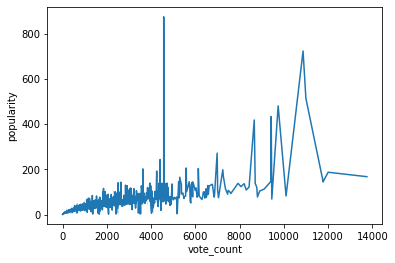

In [39]:
sns.lineplot(data=movies, x='vote_count', y='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='popularity'>

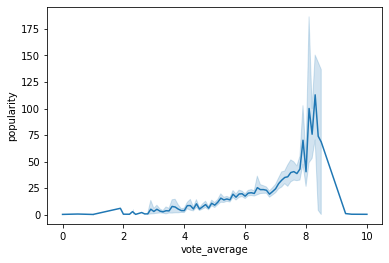

In [37]:
sns.lineplot(data=movies, y= 'popularity', x= 'vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='vote_average'>

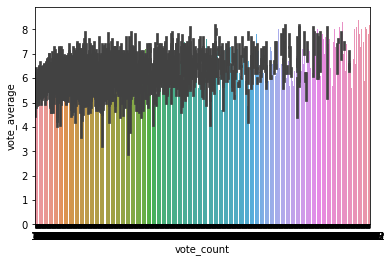

In [32]:
sns.barplot(data=movies, y='vote_average', x='vote_count')

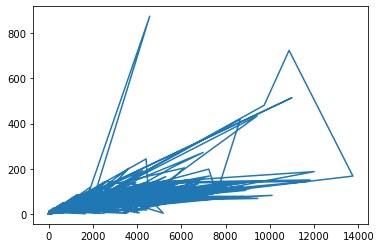

In [38]:
plt.plot(movies['vote_count'], movies['popularity'])
plt.show()